# Exercício

**Obs.1:** Um bom resultado de otimização do problema é quando não existem trechos cruzados.

**Obs.2:** Utilize número de pontos >= 50.

>(b)(3pts) Pegue o melhor resultado do item (a), que deve estar de acordo com a **Obs.1** e fixe os dois tamanhos. Faça experimentos variando as probabilidades de crossover e mutação no problema, plote os resultados obtidos e comente. 

>(c)(3pts) Crie uma função `avalia_percurso_com_restricao` baseada em `avalia_percurso`, que penalize cruzamentos em uma dada longitude ou latitude (vc escolhe). A imagem abaixo mostra um exemplo de restrição sobreposta a uma solução sem restrição.

In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import numpy as np
import math

import matplotlib.pyplot as plt

import tqdm as tqdm


def avalia_percurso(individuo):
    # dado um indivíduo, cria um percurso e calcula a distância euclideana deste percurso
    return (distancia_total(cria_percurso(individuo)),)

def distancia_total(percurso):
    return sum(distancia(percurso[i], percurso[i-1]) 
               for i in range(len(percurso)))

def cria_percurso(individuo):
    # dado um indivíduo, cria um percurso 
    return [list(coordenadas)[e] for e in individuo]

def distancia(c1,c2):
    # distância euclideana entre dois pontos no espaço complexo (coordenadas dos municípios)
    return abs(c1-c2)

def main_func(N_, n_pop, n_generations, numPontos):
    # CREATOR
    creator.create("FitnessTSP", base.Fitness, weights=(-1.0,))
    creator.create("Individuo", list, fitness=creator.FitnessTSP)

    # TOOLBOX
    toolbox = base.Toolbox()
    toolbox.register("indices", np.random.permutation, N_)
    toolbox.register("individuo", tools.initIterate, creator.Individuo,toolbox.indices)
    toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)

    # Operador de crossover
    toolbox.register("mate", tools.cxOrdered)

    # Operador de mutacao
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.02)

    # Funcao objetivo
    toolbox.register("evaluate", avalia_percurso)

    # Operador de selecao
    toolbox.register("select", tools.selTournament, tournsize=numPontos)

    # Solucao
    pop = toolbox.populacao(n=n_pop)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)

    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop,\
                                       toolbox,\
                                       cxpb=0.7, \
                                       mutpb=0.5, \
                                       ngen=n_generations,\
                                       stats=stats,\
                                       halloffame=hof,\
                                       verbose=False)
    
    return pop, log

**(a)(4pts)** O resultado da otimização depende do tamanho do problema (número de pontos) e da população. Faça experimentos variando-os, plote os resultados obtidos e comente. 

In [ ]:
# Inputs
Ponto = complex

N_ = 50
x_sel = 2*(np.random.random_sample(N_)-0.5)
y_sel = 2*(np.random.random_sample(N_)-0.5)
coordenadas = [Ponto(x_sel[i],y_sel[i]) for i in range(N_)]
numPontos = len(coordenadas)

n_pop = 500
n_generations = 500

In [ ]:
# Variando o numero de pontos
dict_log_min = []
dict_log_avg = []
for n in tqdm(np.arange(100, 1000, 50)):    
    x_sel = 2*(np.random.random_sample(n)-0.5)
    y_sel = 2*(np.random.random_sample(n)-0.5)
    coordenadas = [Ponto(x_sel[i],y_sel[i]) for i in range(n)]
    numPontos = len(coordenadas)

    pop_loop, log_loop = main_func(N_, n_pop, n_generations, numPontos)
    dict_log_min.append(log_loop.select('min')) 
    dict_log_min.append(log_loop.select('avg')) 

In [46]:
dict_log_min

[]

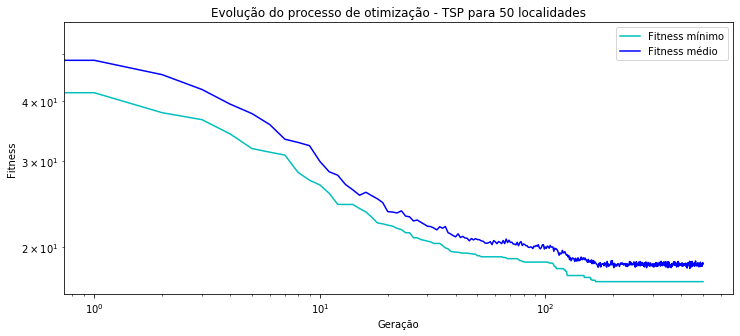

In [16]:
# Plots
plt.figure(figsize=(12, 5))
plots = plt.loglog(log.select('min'),'c-', log.select('avg'), 'b-')
plt.legend(plots, ('Fitness mínimo', 'Fitness médio'), frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Geração');

plt.title("Evolução do processo de otimização - TSP para %d localidades" % numPontos);